In [21]:
import sys
from pathlib import Path

project_root = Path.cwd().parents[0]
sys.path.append(str(project_root))

import matplotlib.pyplot as plt
import numpy as np
import torch
from source.dataset import *

def plot_event(dataset, idx):
    (zx, zy), targets = dataset[idx]

    zx = zx.squeeze(0).numpy()
    zy = zy.squeeze(0).numpy()

    fig, ax = plt.subplots(1, 2, figsize=(14, 5))

    im0 = ax[0].imshow(
        zx,
        origin="lower",
        aspect="auto",
    )
    ax[0].set_title("ZX projection")
    ax[0].set_xlabel("X bin")
    ax[0].set_ylabel("Z bin")
    plt.colorbar(im0, ax=ax[0])

    im1 = ax[1].imshow(
        zy,
        origin="lower",
        aspect="auto",
    )
    ax[1].set_title("ZY projection")
    ax[1].set_xlabel("Y bin")
    ax[1].set_ylabel("Z bin")
    plt.colorbar(im1, ax=ax[1])

    E = 10**targets["E_nu"]
    ELep = 10**targets["E_lep"]
    vx, vy, vz = targets["vx"], targets["vy"], targets["vz"]

    fig.suptitle(
        f"Event {idx} | Eν = {E:.2f} GeV | "
        f"Event {idx} | ELep = {ELep:.2f} GeV | "
        f"vtx=({vx:.1f}, {vy:.1f}, {vz:.1f})"
    )

    plt.tight_layout()
    plt.show()


In [22]:
dataset = torch.load("../data/10000_wEHad/10000_000.pt", map_location="cpu", weights_only=False)
print(len(dataset))


1000


In [23]:
(zx, zy), targets = dataset[0]

print("ZX shape:", zx.shape)  # (1, Z, X)
print("ZY shape:", zy.shape)  # (1, Z, Y)
print("Targets:", targets)


ZX shape: torch.Size([1, 100, 2048])
ZY shape: torch.Size([1, 100, 2048])
Targets: {'E_nu': 2.843419665204918, 'weight': 0.449236298292902, 'vx': -121.72957984768132, 'vy': 1.7455620504840823, 'vz': 42.52655115542968, 'E_lep': 2.615364496533759, 'Eta_lep': 5.1874843, 'E_had': 2.4546596262965936}


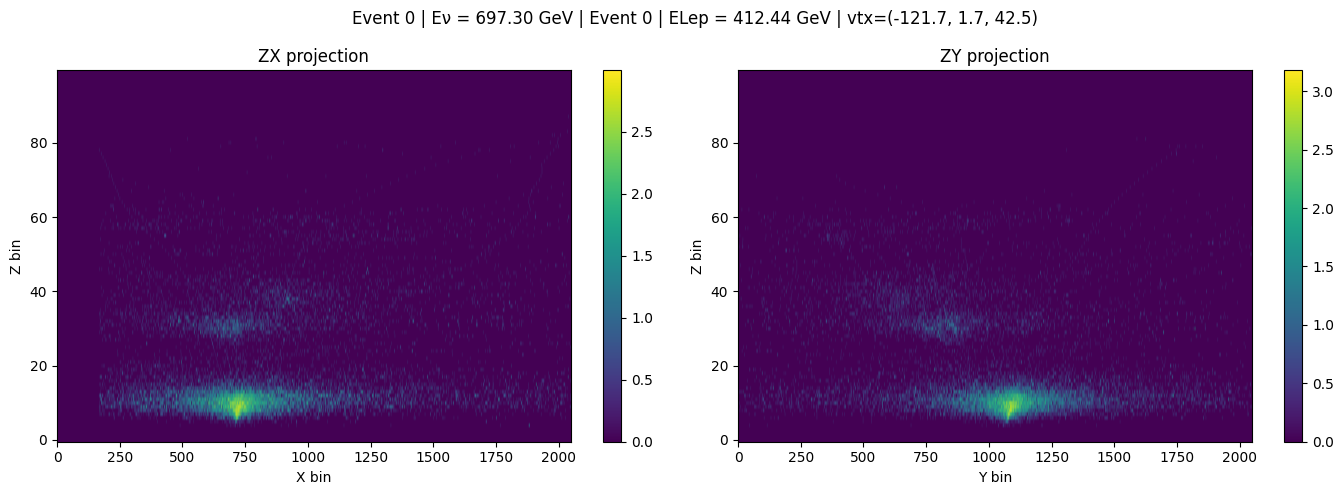

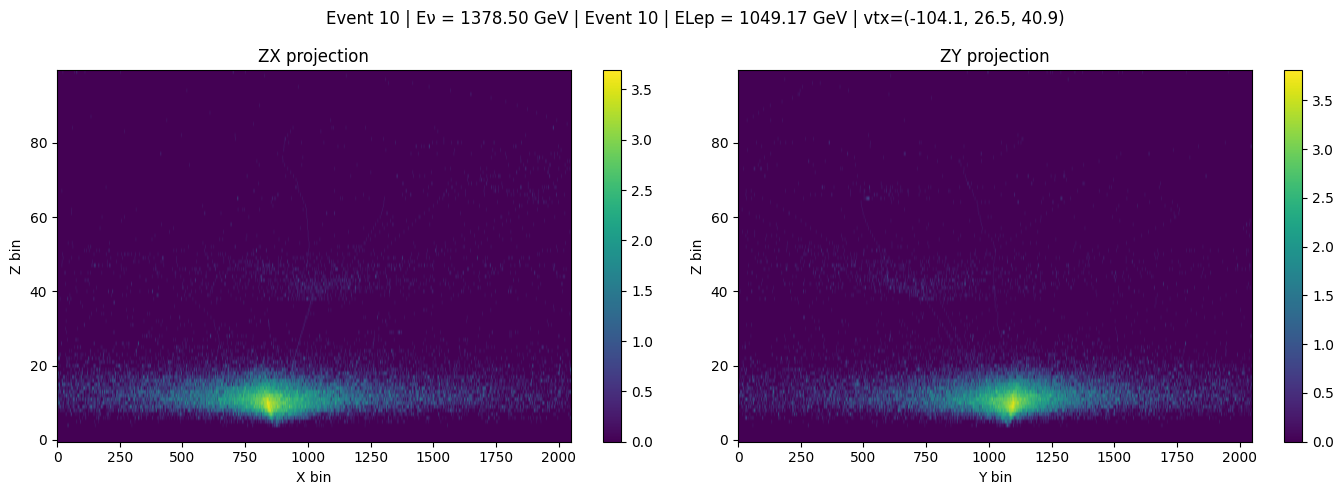

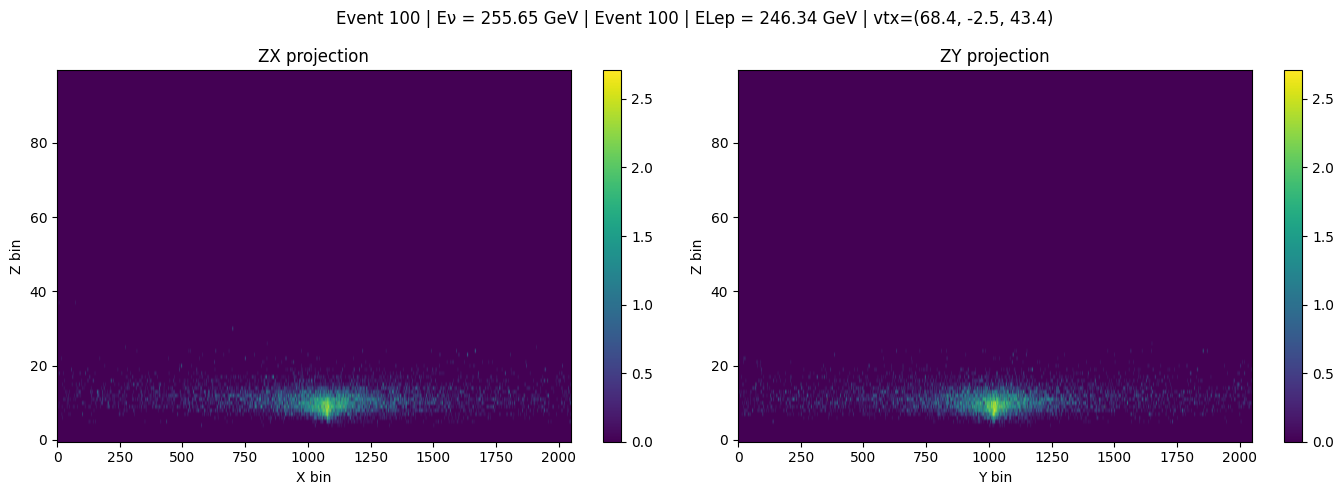

In [24]:
plot_event(dataset, idx=0)
plot_event(dataset, idx=10)
plot_event(dataset, idx=100)


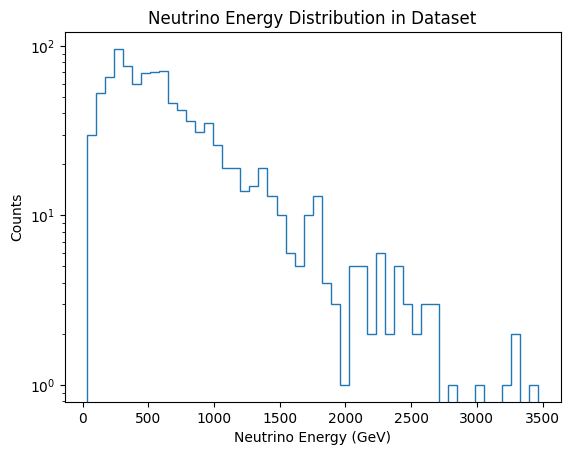

In [29]:
ENu = []
EHad = []
for i in range(len(dataset)):
    (zx, zy), targets = dataset[i]
    ENu.append(10**targets["E_nu"])
    EHad.append(10**targets["E_had"])


plt.hist(ENu, bins=50, histtype="step")
plt.xlabel("Neutrino Energy (GeV)")
plt.ylabel("Counts")
plt.yscale("log")
plt.title("Neutrino Energy Distribution in Dataset")
plt.show()

[284.87846874999997, 44.150945312500006, 765.4960624999999, 151.69051562500002, 36.797207031250004, 251.6379374999999, 47.55937890625, 435.09240625000007, 101.71789062499997, 1.8874619140625, 59.34585156250001, 104.91450781250006, 102.262015625, 19.508767578125003, 926.1055625000001, 101.08303125000002, 524.6705625000002, 450.95262500000024, 16.523093749999997, 15.831225585937498, 10.201963867187501, 269.764625, 181.42421874999997, 180.7525625000001, 41.479679687499996, 615.2871875, 11.850106445312498, 33.35986718750001, 56.134835937499986, 68.84133593750002, 3.04123681640625, 13.265249023437498, 15.291254882812503, 45.85222656249999, 175.7049062499999, 13.550023437500004, 52.564949218750016, 375.9131562499999, 9.7191865234375, 71.5307421875, 71.55659374999999, 25.123921875, 148.50670312500006, 1213.3907500000007, 116.684859375, 49.84549609375, 61.999875, 127.49347656249996, 16.756669921874998, 84.88110937500001, 66.26875, 228.27024999999992, 31.906310546875, 17.707679687500004, 14.801

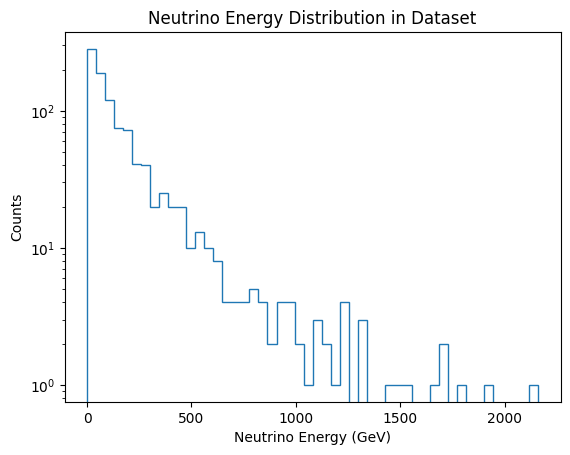

In [31]:
plt.hist(EHad, bins=50, histtype="step")
print(EHad)
plt.xlabel("Neutrino Energy (GeV)")
plt.ylabel("Counts")
plt.yscale("log") 
plt.title("Neutrino Energy Distribution in Dataset")
plt.show()